<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/rad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

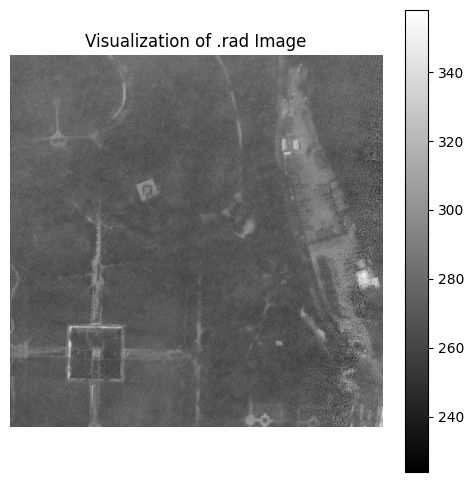

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Manually specify dimensions and dtype
width = 512
height = 512
dtype = np.uint16

# Load the binary .rad file
file_path = '/content/band1_image2.rad'
with open(file_path, 'rb') as f:
    img = np.fromfile(f, dtype=dtype).reshape((height, width))

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Visualization of .rad Image")
plt.axis('off')
plt.colorbar()
plt.show()


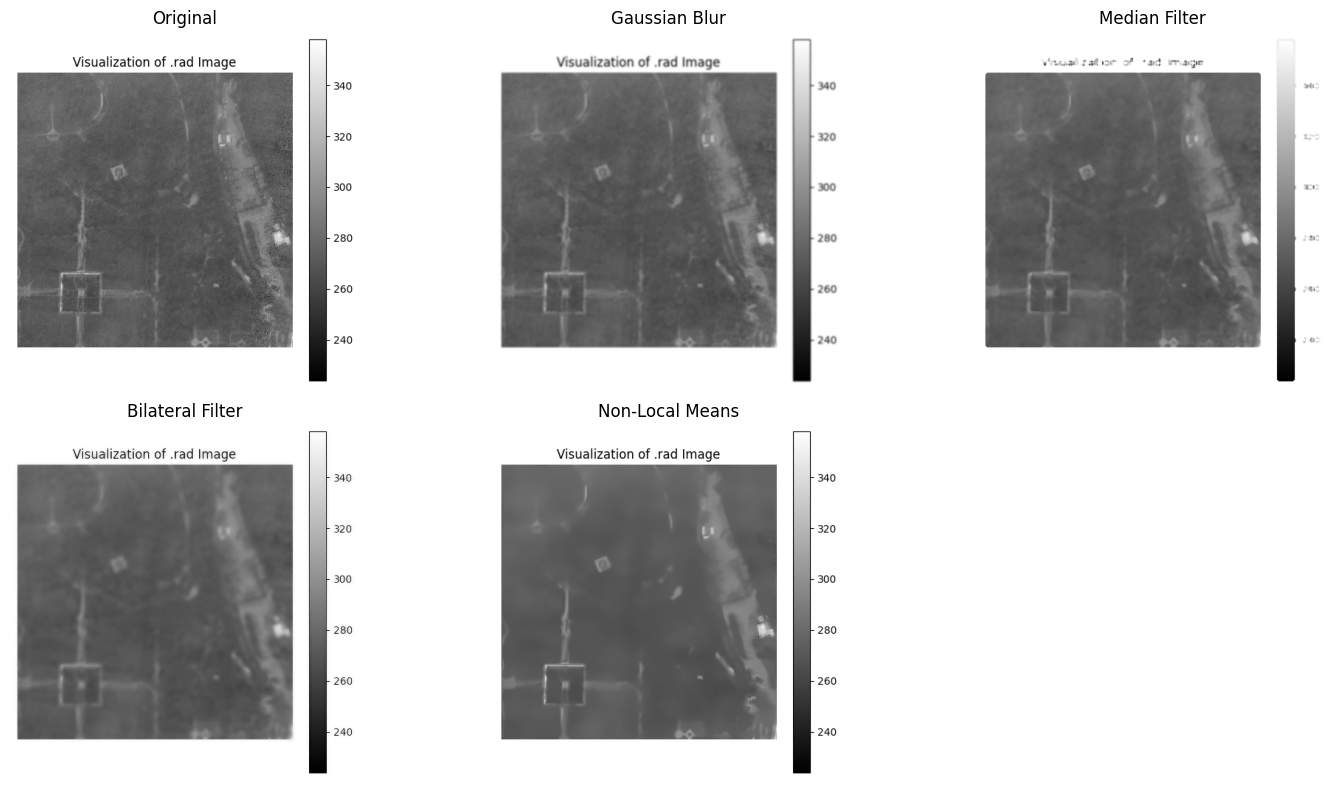

In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the grayscale image
img = cv2.imread('/content/rad_2.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply denoising techniques
gaussian  = cv2.GaussianBlur(img, (5, 5), 0)
median    = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
nlm       = cv2.fastNlMeansDenoising(img, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 3: Visualization setup
titles = ['Original', 'Gaussian Blur', 'Median Filter', 'Bilateral Filter', 'Non-Local Means']
images = [img, gaussian, median, bilateral, nlm]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


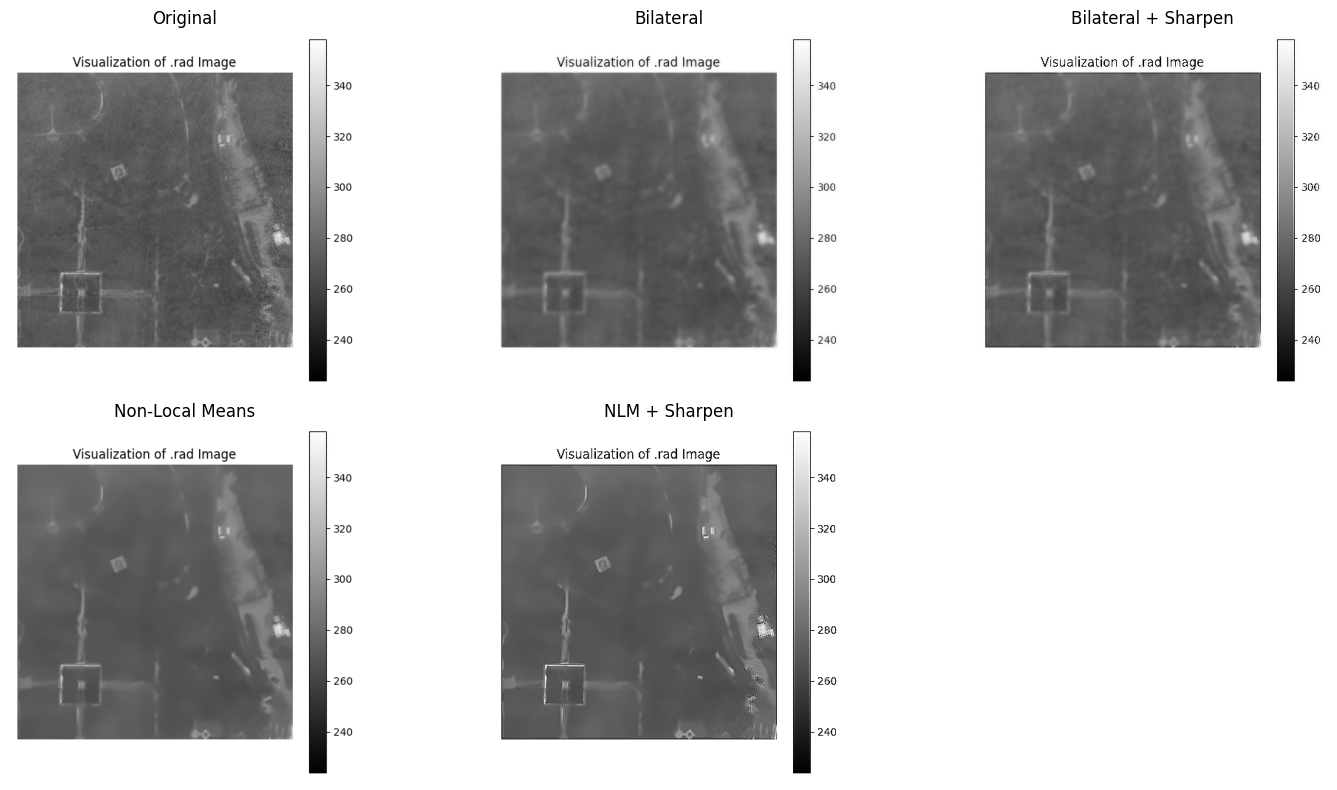

In [5]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load image in grayscale
img = cv2.imread('/content/rad_2.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Denoising
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
nlm       = cv2.fastNlMeansDenoising(img, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 3: Optional sharpening filter
def sharpen(image):
    kernel = np.array([[0, -1,  0],
                       [-1, 5, -1],
                       [0, -1,  0]])
    return cv2.filter2D(image, -1, kernel)

bilateral_sharp = sharpen(bilateral)
nlm_sharp = sharpen(nlm)

# Step 4: Plot original + detail-preserving filters
titles = ['Original', 'Bilateral', 'Bilateral + Sharpen', 'Non-Local Means', 'NLM + Sharpen']
images = [img, bilateral, bilateral_sharp, nlm, nlm_sharp]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
